# Titanic

The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew.

The Titanic was the product of intense competition among rival shipping lines in the first half of the 20th century. In particular, the White Star Line found itself in a battle for steamship primacy with Cunard, a venerable British firm with two standout ships that ranked among the most sophisticated and luxurious of their time.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [85]:
titanic=pd.read_csv("https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_3_Python/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [88]:
titanic.shape

(891, 12)

In [89]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
#Explain the dataset
print("passiengerID: Passenger’s ID")
print("Survived:     Survived (1) or died (0)\n")
print("Pclass:       Passenger’s class")
print("Name:         Passenger’s name\n")
print("Sex:          Passenger’s sex")
print("SibSp:        Number of siblings/spouses aboard\n")
print("Parch:        Number of parents/children aboard")
print("Ticket:       Ticket number\n")
print("Fare:         Fare")
print("Name:         Passenger’s name\n")
print("Cabin:        Cabin")
print("Embarked:     Port of embarkation")

passiengerID: Passenger’s ID
Survived:     Survived (1) or died (0)

Pclass:       Passenger’s class
Name:         Passenger’s name

Sex:          Passenger’s sex
SibSp:        Number of siblings/spouses aboard

Parch:        Number of parents/children aboard
Ticket:       Ticket number

Fare:         Fare
Name:         Passenger’s name

Cabin:        Cabin
Embarked:     Port of embarkation


# Survived :

In [91]:
avg_survived=titanic['Survived'].mean() *100
print(avg_survived, "%")

38.38383838383838 %


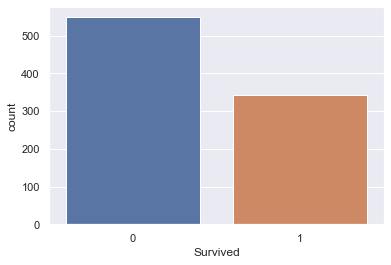

In [92]:
sns.countplot(x='Survived' , data=titanic)

**note**: 0= Not survived , 1=survived

**The unsrvived people is higher than survived people, and the average of survived people is 38% .**

In [93]:
titanic.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

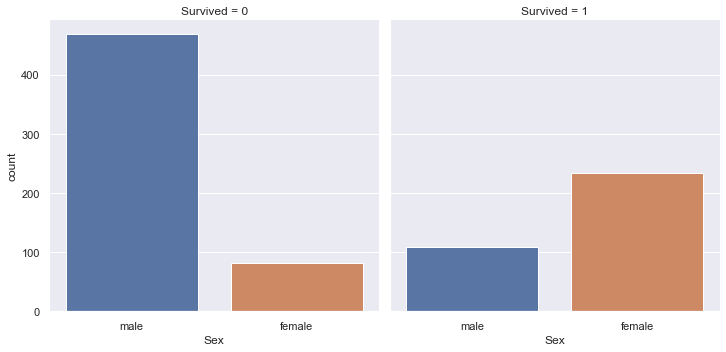

In [149]:
sns.catplot(x='Sex' , col='Survived' , kind='count' , data =titanic);

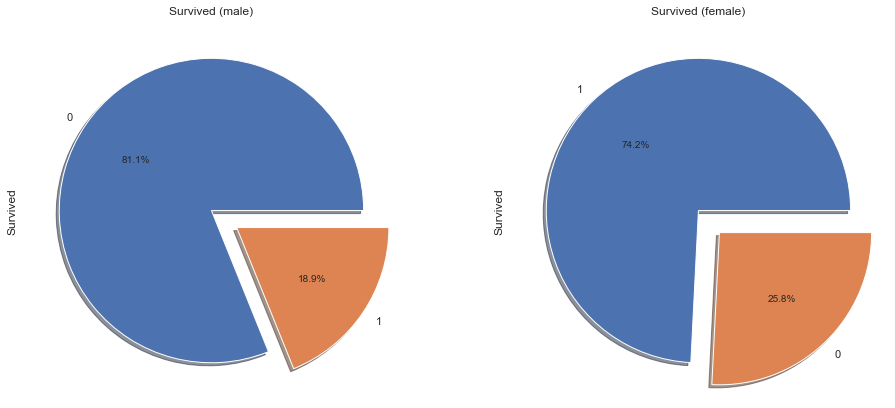

In [95]:
f,ax=plt.subplots(1,2,figsize=(16,7))
titanic['Survived'][titanic['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic['Survived'][titanic['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [96]:
print("The percentage of women survived: " , titanic[titanic.Sex == 'female'].Survived.sum()/titanic[titanic.Sex == 'female'].Survived.count()*100,"%")
print("The percentage  of men survived:   " , titanic[titanic.Sex == 'male'].Survived.sum()/titanic[titanic.Sex == 'male'].Survived.count()*100,"%")

The percentage of women survived:  74.20382165605095 %
The percentage  of men survived:    18.890814558058924 %


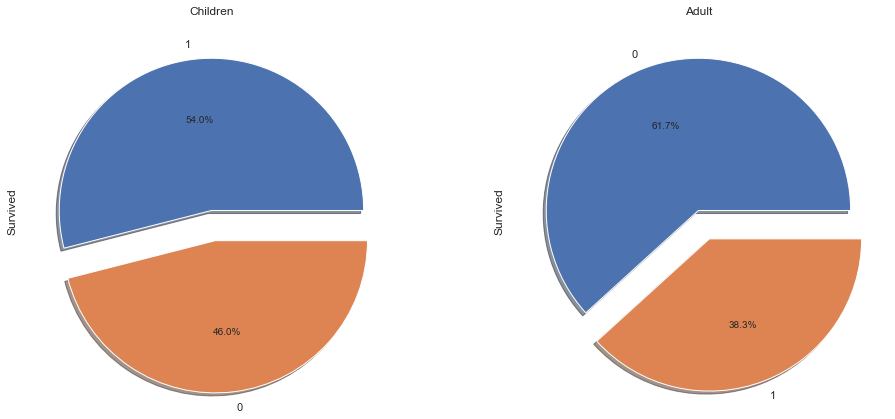

In [175]:
f,ax=plt.subplots(1,2,figsize=(16,7))
titanic['Survived'][titanic['Age']<18].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic['Survived'][titanic['Age']>18].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Children')
ax[1].set_title('Adult')

plt.show()

**The female Survived more than male Survived,**

**where 18% of men survived "109", and 74% of women that survived  "233" , and children survived with 54%**

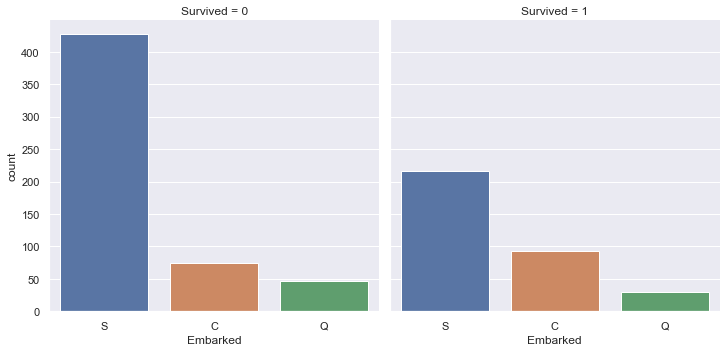

In [148]:
sns.catplot(x='Embarked' , col='Survived' , kind='count' , data =titanic);

In [173]:
survived_EM_C=titanic[titanic['Embarked']=='C'].Survived.mean()*100
print("percentage of survived in C Embarked",survived_EM_C, "%")
print("Details:\n",titanic[titanic['Embarked']=='C'].groupby(['Sex']).Survived.mean()*100,"%\n")
survived_EM_S=titanic[titanic['Embarked']=='S'].Survived.mean()*100
print("percentage of survived in S Embarked",survived_EM_S, "%")
print("Details:\n",titanic[titanic['Embarked']=='S'].groupby(['Sex']).Survived.mean()*100,"%\n")
survived_EM_Q=titanic[titanic['Embarked']=='Q'].Survived.mean()*100
print("percentage of survived in Q Embarked",survived_EM_Q, "%")
print("Details:\n",titanic[titanic['Embarked']=='Q'].groupby(['Sex']).Survived.mean()*100,"%\n")


percentage of survived in C Embarked 55.35714285714286 %
Details:
 Sex
female    87.671233
male      30.526316
Name: Survived, dtype: float64 %

percentage of survived in S Embarked 33.69565217391305 %
Details:
 Sex
female    68.965517
male      17.460317
Name: Survived, dtype: float64 %

percentage of survived in Q Embarked 38.961038961038966 %
Details:
 Sex
female    75.000000
male       7.317073
Name: Survived, dtype: float64 %



**The survived in C Embarked has the highest survived with 55% and 87% women survived , 30% men Survived**

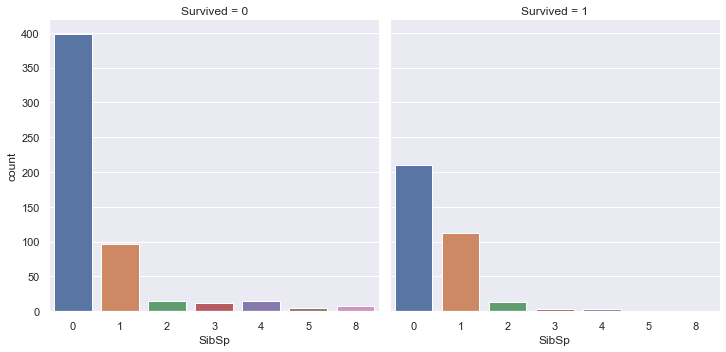

In [144]:
sns.catplot(x='SibSp' , col='Survived' , kind='count' , data =titanic);

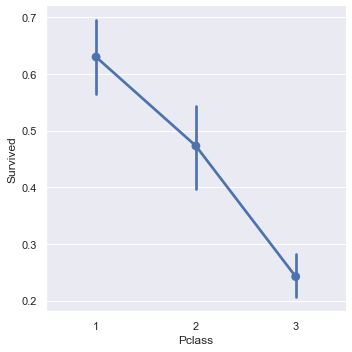

In [97]:
sns.catplot('Pclass','Survived', kind='point' , data=titanic)

In [174]:
print("percentage of survivals in") 
print("P class 1 : ", titanic.Survived[titanic.Pclass == 1].sum()/titanic[titanic.Pclass == 1].Survived.count()*100,"%")
print("P class 2 : ", titanic.Survived[titanic.Pclass == 2].sum()/titanic[titanic.Pclass == 2].Survived.count()*100,"%")
print("P class 3 : ", titanic.Survived[titanic.Pclass == 3].sum()/titanic[titanic.Pclass == 3].Survived.count()*100,"%")

percentage of survivals in
P class 1 :  62.96296296296296 %
P class 2 :  47.28260869565217 %
P class 3 :  24.236252545824847 %


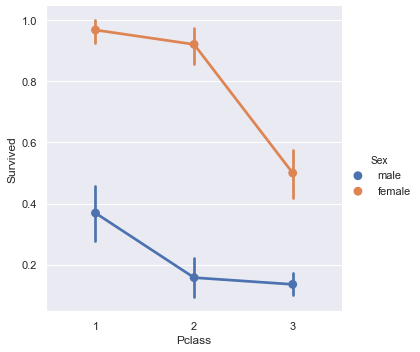

In [51]:
sns.catplot('Pclass' , 'Survived', hue='Sex' , kind='point' , data=titanic)

**the percentage of survived people depend on Passnger Calss , and you can see the highest survived percentage is in Calss 1
is 62% and most of them are women's**

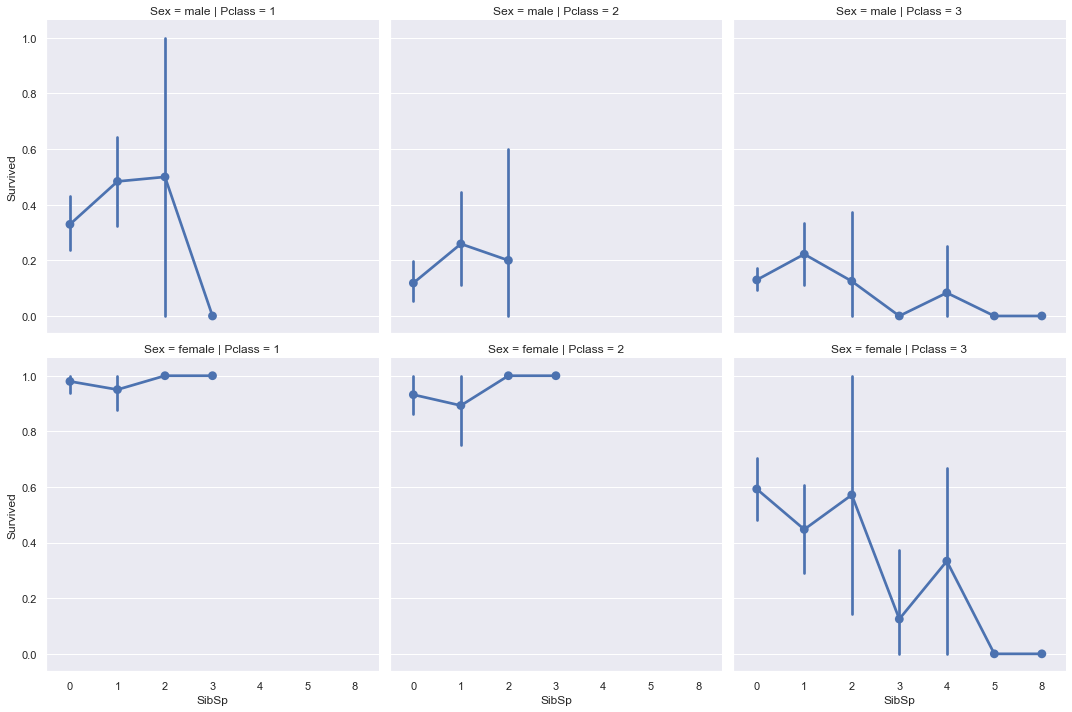

In [98]:
sns.catplot('SibSp' , 'Survived' , col='Pclass' , row = 'Sex' ,
           kind='point' , data=titanic)

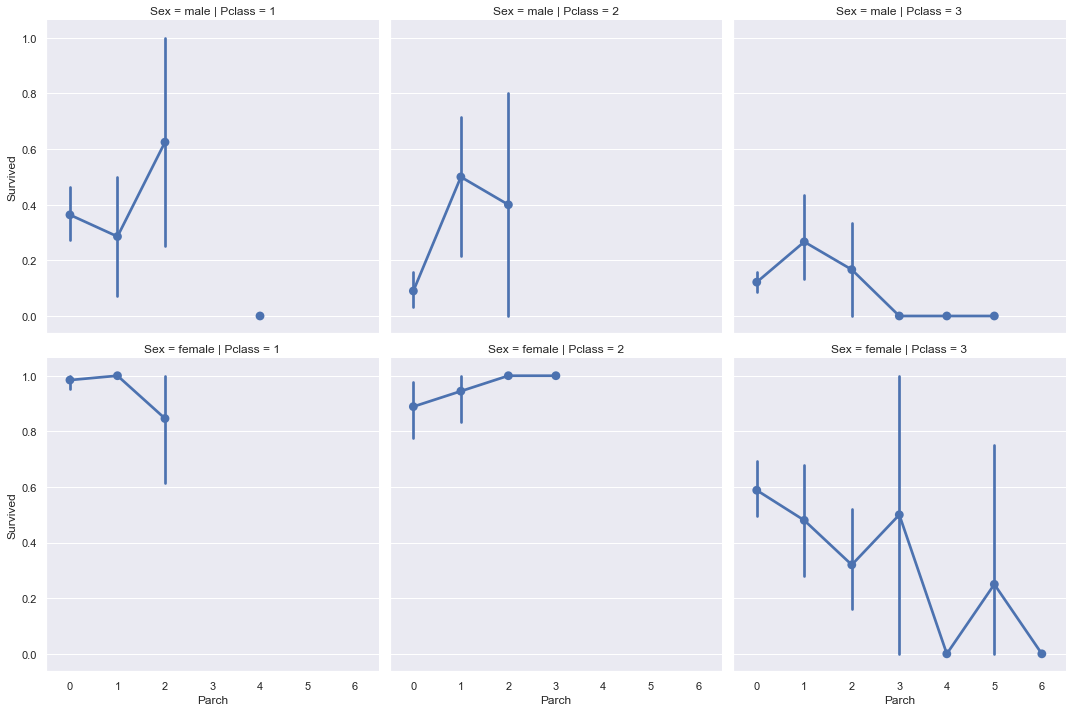

In [176]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=titanic)

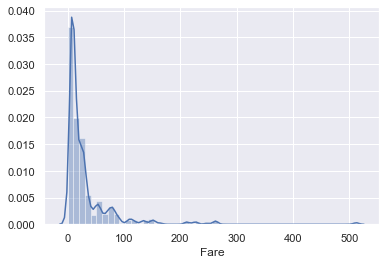

In [129]:
sns.distplot(titanic['Fare'])

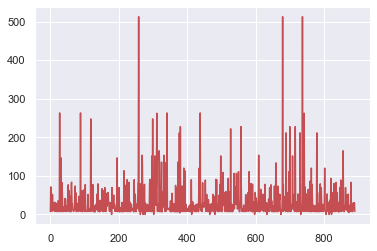

In [128]:
plt.plot(titanic['Fare'],  color = 'r')
plt.show()

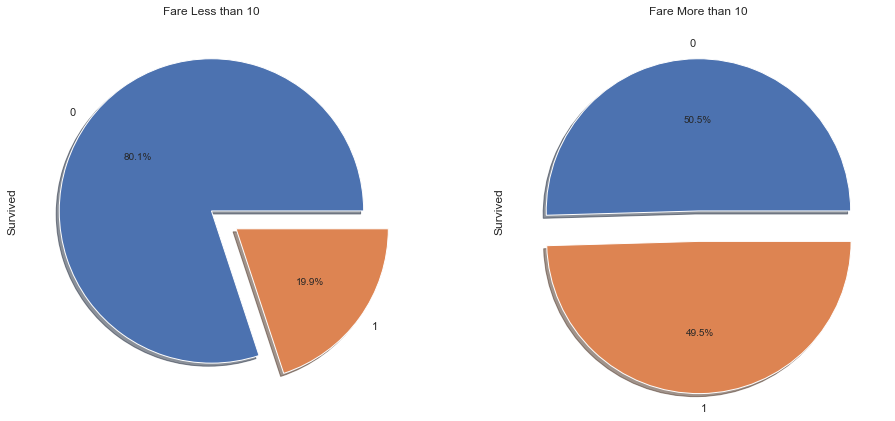

In [136]:
f,ax=plt.subplots(1,2,figsize=(16,7))
titanic['Survived'][titanic['Fare']<10].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic['Survived'][titanic['Fare']>10].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Fare Less than 10')
ax[1].set_title('Fare More than 10')

plt.show()

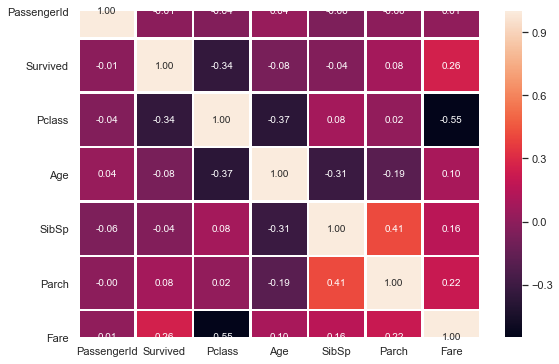

In [134]:
corr = titanic.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()